# ***Topic: 자동차 보험 사기를 탐지하는 알고리즘 개발***
#### *Dataset: https://www.kaggle.com/datasets/mykeysid10/insurance-claims-fraud-detection/data*

'months_as_customer': 고객이 보험 회사와 연계된 개월 수 --> O

'age': 사람의 나이 --> O

'policy_number': 보험 증서 번호 --> X

'policy_bind_date': 보험 적용일 보류 --> 사건 발생날짜 계산

'policy_state': 보험이 등록된(주) --> 보류

'policy_csl': 복합 단일 한도, 총 손해에서 신체 손상이 얼마나 커버되는지 --> O

'policy_deductable': 보험 계약자가 직접 지불해야 하는 금액으로 보험 제공자가 어떠한 비용을 지급하기 전에 지불해야 하는 금액 --> O

'policy_annual_premium': 보험 계약의 연간 보험료 --> O

'umbrella_limit': 가지고 있는 개인 책임보험들의 보상한도를 넘어서는 보상을 해야 할 경우를 대비한 것 --> 보류

'insured_zip': 보험이 등록된 우편번호 --> X

'insured_sex': 보험 계약자의 성별 --> 보류

'insured_education_level': 보험 계약자의 최고 학력 자격 --> O

'insured_occupation': 보험 계약자의 직업 --> O

'insured_hobbies': 보험 계약자의 취미 --> X

'insured_relationship':보험 계약자의 가족 관계 --> X

'capital-gains': 개인의 금전적 이득 --> O

'capital-loss': 개인의 금전적 손실 --> 0

'incident_date': 사건 발생 날짜 --> 보험 적용일로 계산

'incident_type': 사건 발생 유형 --> O

'collision_type': 발생한 충돌의 유형 --> O

'incident_severity': 사건의 심각성 --> O

'authorities_contacted': 연락된 당국 --> 보류

'incident_state': 사건 발생한 주(state) --> O

'incident_city': 사건 발생 도시 --> X

'incident_location': 사건 발생 거리 --> X

'incident_hour_of_the_day': 사건 발생 시간대 --> O

'number_of_vehicles_involved': 사건에 관련된 차량 수 --> O

'property_damage': 재산 피해 --> O

'bodily_injuries': 인명 피해 --> O

'witnesses': 목격자 수 --> O

'police_report_available': 경찰 보고서의 유무 --> O

'total_claim_amount': 고객이 청구한 총 금액 --> O

'injury_claim': 상해 청구 금액 --> O

'property_claim': 재산 손해 청구 금액 --> O

'vehicle_claim': 차량 손해 청구 금액 --> O

'auto_make': 차량 제조업체 --> X

'auto_model': 차량 모델 --> X

'auto_year': 차량 연식 --> O

'fraud_reported: 사기 보고 여부 label

In [2]:
!pip install category_encoders
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce


from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings('ignore')

In [3]:
table = pd.read_csv("https://raw.githubusercontent.com/rlagkdms4372/dataset/main/fraud_insurance_claims.csv",  sep = ",")
table.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2014-10-17 00:00:00,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,2006-06-27 00:00:00,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,2000-09-06 00:00:00,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,1990-05-25 00:00:00,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,2014-06-06 00:00:00,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [30]:
table.shape

(1000, 39)

In [31]:
# 결측값
table.isna().sum()

,0
months_as_customer,0
age,0
policy_number,0
policy_bind_date,0
policy_state,0
policy_csl,0
policy_deductable,0
policy_annual_premium,0
umbrella_limit,0
insured_zip,0


In [32]:
table.dtypes

,0
months_as_customer,int64
age,int64
policy_number,int64
policy_bind_date,object
policy_state,object
policy_csl,object
policy_deductable,int64
policy_annual_premium,float64
umbrella_limit,int64
insured_zip,int64


In [33]:
# len(table) -> 1000
for _ in table.columns:
  print(table[_].value_counts())

months_as_customer
194    8
128    7
254    7
140    7
210    7
      ..
390    1
411    1
453    1
448    1
17     1
Name: count, Length: 391, dtype: int64
age
43    49
39    48
41    45
34    44
38    42
30    42
31    42
37    41
33    39
40    38
32    38
29    35
46    33
42    32
35    32
36    32
44    32
28    30
26    26
45    26
48    25
47    24
27    24
57    16
25    14
55    14
49    14
53    13
50    13
24    10
54    10
61    10
51     9
60     9
58     8
56     8
23     7
21     6
59     5
62     4
52     4
64     2
63     2
19     1
20     1
22     1
Name: count, dtype: int64
policy_number
521585    1
687755    1
674485    1
223404    1
991480    1
         ..
563878    1
620855    1
583169    1
337677    1
556080    1
Name: count, Length: 1000, dtype: int64
policy_bind_date
2006-01-01 00:00:00    3
1992-04-28 00:00:00    3
1992-08-05 00:00:00    3
1991-12-14 00:00:00    2
2004-08-09 00:00:00    2
                      ..
2014-06-03 00:00:00    1
1998-12-12 00:00:00  

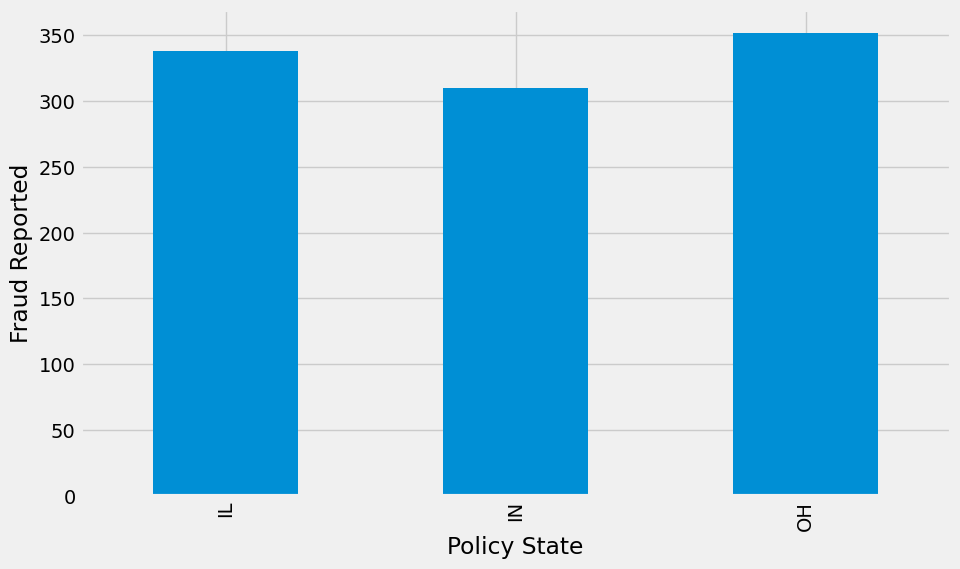

In [4]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,6))
ax = table.groupby('policy_state').fraud_reported.count().plot.bar(ylim=0)
ax.set_ylabel('Fraud Reported')
ax.set_xlabel('Policy State')
plt.show()

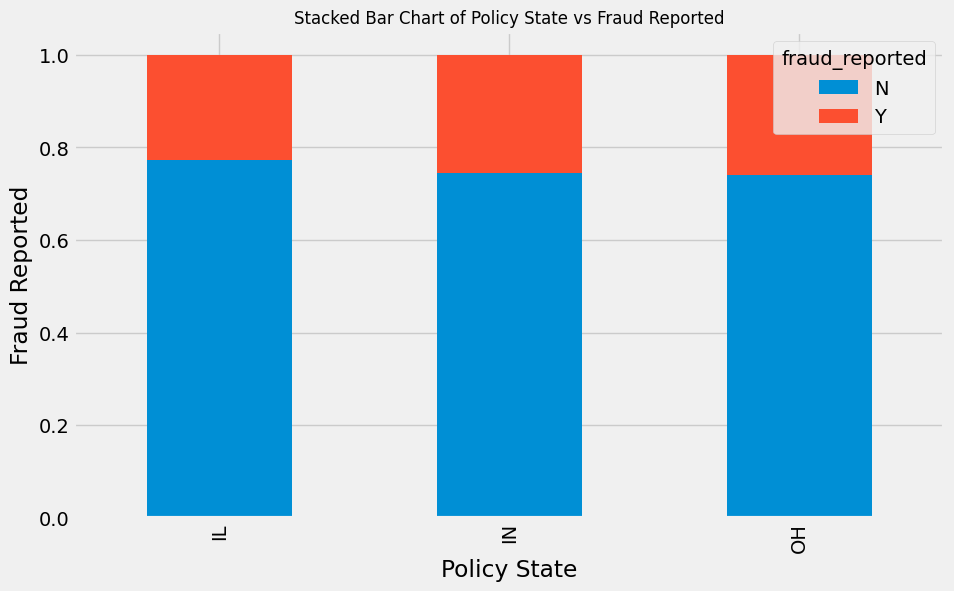

In [35]:
plt.rcParams['figure.figsize'] = [10, 6]
ax= plt.style.use('fivethirtyeight')
table=pd.crosstab(table.policy_state, table.fraud_reported)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Policy State vs Fraud Reported', fontsize=12)
plt.xlabel('Policy State')
plt.ylabel('Fraud Reported')
plt.show()

In [5]:
# NULL 값들을 지우기 --> authorities_contacted에 있는 91개의 null 값을 지
table = table.dropna(axis=0)
table.shape

(909, 39)

In [6]:
table['policy_bind_date'] = pd.to_datetime(table['policy_bind_date'] ).dt.strftime("%Y-%m-%d")
table['incident_date'] = pd.to_datetime(table['incident_date'] ).dt.strftime("%Y-%m-%d")

table['policy_bind_date'] = pd.to_datetime(table['policy_bind_date'], format="%Y-%m-%d")
table['incident_date'] = pd.to_datetime(table['incident_date'], format="%Y-%m-%d")


In [7]:
from datetime import datetime
from dateutil import relativedelta
def month_difference(start_date, end_date):
    return (end_date.year - start_date.year) * 12 + end_date.month - start_date.month

#날짜 차이 계산
table['month_difference'] = table.apply(lambda row: month_difference(row['policy_bind_date'], row['incident_date']), axis=1)
table = table.drop(columns = ['policy_bind_date', 'incident_date'])


In [8]:
table = table.drop(columns = ['policy_number','insured_zip', 'insured_hobbies', 'insured_relationship', 'incident_city', 'incident_location', 'auto_make', 'auto_model'])
table = table.drop(columns = ['incident_hour_of_the_day', 'capital-gains', 'policy_state', 'injury_claim', 'policy_annual_premium', 'auto_year', 'months_as_customer', 'month_difference', 'capital-loss', 'age', 'insured_education_level',
                              'policy_csl', 'umbrella_limit', 'incident_type', 'bodily_injuries', 'police_report_available'])
table

,policy_deductable,insured_sex,insured_occupation,collision_type,incident_severity,authorities_contacted,incident_state,number_of_vehicles_involved,property_damage,witnesses,total_claim_amount,property_claim,vehicle_claim,fraud_reported
0,1000,MALE,craft-repair,Side Collision,Major Damage,Police,SC,1,YES,2,71610,13020,52080,Y
1,2000,MALE,machine-op-inspct,?,Minor Damage,Police,VA,1,?,0,5070,780,3510,Y
2,2000,FEMALE,sales,Rear Collision,Minor Damage,Police,NY,3,NO,3,34650,3850,23100,N
3,2000,FEMALE,armed-forces,Front Collision,Major Damage,Police,OH,1,?,2,63400,6340,50720,Y
5,1000,FEMALE,tech-support,Rear Collision,Major Damage,Fire,SC,3,NO,2,64100,6410,51280,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1000,FEMALE,craft-repair,Front Collision,Minor Damage,Fire,NC,1,YES,1,87200,8720,61040,N
996,1000,FEMALE,prof-specialty,Rear Collision,Major Damage,Fire,SC,1,YES,3,108480,18080,72320,N
997,500,FEMALE,armed-forces,Side Collision,Minor Damage,Police,NC,3,?,3,67500,7500,52500,N
998,2000,MALE,handlers-cleaners,Rear Collision,Major Damage,Other,NY,1,?,1,46980,5220,36540,N


In [42]:
table

,policy_deductable,insured_sex,insured_occupation,collision_type,incident_severity,authorities_contacted,incident_state,number_of_vehicles_involved,property_damage,witnesses,total_claim_amount,property_claim,vehicle_claim,fraud_reported
0,1000,MALE,craft-repair,Side Collision,Major Damage,Police,SC,1,YES,2,71610,13020,52080,Y
1,2000,MALE,machine-op-inspct,?,Minor Damage,Police,VA,1,?,0,5070,780,3510,Y
2,2000,FEMALE,sales,Rear Collision,Minor Damage,Police,NY,3,NO,3,34650,3850,23100,N
3,2000,FEMALE,armed-forces,Front Collision,Major Damage,Police,OH,1,?,2,63400,6340,50720,Y
5,1000,FEMALE,tech-support,Rear Collision,Major Damage,Fire,SC,3,NO,2,64100,6410,51280,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1000,FEMALE,craft-repair,Front Collision,Minor Damage,Fire,NC,1,YES,1,87200,8720,61040,N
996,1000,FEMALE,prof-specialty,Rear Collision,Major Damage,Fire,SC,1,YES,3,108480,18080,72320,N
997,500,FEMALE,armed-forces,Side Collision,Minor Damage,Police,NC,3,?,3,67500,7500,52500,N
998,2000,MALE,handlers-cleaners,Rear Collision,Major Damage,Other,NY,1,?,1,46980,5220,36540,N


In [9]:
# '?'를 'unsure'로 변경하기
table.replace('?', 'UNSURE', inplace=True)

In [44]:
table.head()

,policy_deductable,insured_sex,insured_occupation,collision_type,incident_severity,authorities_contacted,incident_state,number_of_vehicles_involved,property_damage,witnesses,total_claim_amount,property_claim,vehicle_claim,fraud_reported
0,1000,MALE,craft-repair,Side Collision,Major Damage,Police,SC,1,YES,2,71610,13020,52080,Y
1,2000,MALE,machine-op-inspct,UNSURE,Minor Damage,Police,VA,1,UNSURE,0,5070,780,3510,Y
2,2000,FEMALE,sales,Rear Collision,Minor Damage,Police,NY,3,NO,3,34650,3850,23100,N
3,2000,FEMALE,armed-forces,Front Collision,Major Damage,Police,OH,1,UNSURE,2,63400,6340,50720,Y
5,1000,FEMALE,tech-support,Rear Collision,Major Damage,Fire,SC,3,NO,2,64100,6410,51280,Y


In [45]:
# 기초통계량 확인
table.describe().T

,count,mean,std,min,25%,50%,75%,max
policy_deductable,909.0,1131.463146,611.958791,500.0,500.0,1000.0,2000.0,2000.0
number_of_vehicles_involved,909.0,1.922992,1.031769,1.0,1.0,1.0,3.0,4.0
witnesses,909.0,1.481848,1.111093,0.0,0.0,1.0,2.0,3.0
total_claim_amount,909.0,57507.645765,22779.061381,100.0,48060.0,60200.0,72100.0,114920.0
property_claim,909.0,8064.906491,4552.940222,0.0,5340.0,7120.0,11260.0,23670.0
vehicle_claim,909.0,41341.848185,16253.292262,70.0,34370.0,43680.0,51680.0,79560.0


policy_csl : Ordinal (value 3)  
100/300     349  
250/500     351  
500/1000    300  

insured_education_level : Ordinal (value 7)  
High School    160  
Associate      145  
College        122  
Masters        143  
JD             161  
MD             144  
PhD            125  

✅incident_severity : Ordinal (value 4)  
Trivial Damage     90  
Minor Damage      354  
Major Damage      276  
Total Loss        280  

policy_state : Binary (value 3)  
OH    352  
IL    338  
IN    310  
  
✅insured_sex : Binary (value 2)  
FEMALE    537  
MALE      463  

✅authorities_contacted : Binary (value 4)  
Police       292  
Fire         223  
Other        198  
Ambulance    196  

✅property_damage: Binary (value 3)  
UNSURE      360  
NO     338  
YES    302  

police_report_available: Binary (value 3)  
UNSURE      343  
NO     343  
YES    314  


✅insured_occupation : Binary (value 14)  
machine-op-inspct    93  
prof-specialty       85  
tech-support         78  
sales                76  
exec-managerial      76  
craft-repair         74  
transport-moving     72  
other-service        71  
priv-house-serv      71  
armed-forces         69  
adm-clerical         65  
protective-serv      63  
handlers-cleaners    54  
farming-fishing      53  


incident_type : Binary (value 4)  
Multi-vehicle Collision     419  
Single Vehicle Collision    403  
Vehicle Theft                94  
Parked Car                   84  
  
✅collision_type : Binary (value 4)  
Rear Collision     292  
Side Collision     276  
Front Collision    254  
UNSURE             178  

✅incident_state: Binary (value 7)  
incident_state  
NY    262  
SC    248  
WV    217  
VA    110  
NC    110  
PA     30  
OH     23  

In [ ]:
#table["policy_csl"].unique()

In [10]:
# Ordinal Encoding
incident_severity_map = {"Trivial Damage":1, "Minor Damage":2, "Major Damage":3, "Total Loss":4}
table["incident_severity"] = table["incident_severity"].map(incident_severity_map)

table.head()

,policy_deductable,insured_sex,insured_occupation,collision_type,incident_severity,authorities_contacted,incident_state,number_of_vehicles_involved,property_damage,witnesses,total_claim_amount,property_claim,vehicle_claim,fraud_reported
0,1000,MALE,craft-repair,Side Collision,3,Police,SC,1,YES,2,71610,13020,52080,Y
1,2000,MALE,machine-op-inspct,UNSURE,2,Police,VA,1,UNSURE,0,5070,780,3510,Y
2,2000,FEMALE,sales,Rear Collision,2,Police,NY,3,NO,3,34650,3850,23100,N
3,2000,FEMALE,armed-forces,Front Collision,3,Police,OH,1,UNSURE,2,63400,6340,50720,Y
5,1000,FEMALE,tech-support,Rear Collision,3,Fire,SC,3,NO,2,64100,6410,51280,Y


In [11]:
target_map = {'Y': 1, 'N': 0}
table['fraud_reported'] = table['fraud_reported'].map(target_map)


In [12]:
# Binary Encoding

cols_list = [
    "insured_sex",
    "authorities_contacted",
    "property_damage",
    "insured_occupation",
    "collision_type",
    "incident_state",
    ]
feature_in= []
feature_out = []

for _ in cols_list:
  encoder = ce.BinaryEncoder(cols=[_])
  table_temp = encoder.fit_transform(table[_])
  feature_in.append(encoder.get_feature_names_in)
  feature_out.append(encoder.get_feature_names_out)
  table = pd.concat([table, table_temp], axis=1)
  table = table.drop(columns=[_])

table.head()

,policy_deductable,incident_severity,number_of_vehicles_involved,witnesses,total_claim_amount,property_claim,vehicle_claim,fraud_reported,insured_sex_0,insured_sex_1,...,insured_occupation_0,insured_occupation_1,insured_occupation_2,insured_occupation_3,collision_type_0,collision_type_1,collision_type_2,incident_state_0,incident_state_1,incident_state_2
0,1000,3,1,2,71610,13020,52080,1,0,1,...,0,0,0,1,0,0,1,0,0,1
1,2000,2,1,0,5070,780,3510,1,0,1,...,0,0,1,0,0,1,0,0,1,0
2,2000,2,3,3,34650,3850,23100,0,1,0,...,0,0,1,1,0,1,1,0,1,1
3,2000,3,1,2,63400,6340,50720,1,1,0,...,0,1,0,0,1,0,0,1,0,0
5,1000,3,3,2,64100,6410,51280,1,1,0,...,0,1,0,1,0,1,1,0,0,1


In [49]:
table

,policy_deductable,incident_severity,number_of_vehicles_involved,witnesses,total_claim_amount,property_claim,vehicle_claim,fraud_reported,insured_sex_0,insured_sex_1,...,insured_occupation_0,insured_occupation_1,insured_occupation_2,insured_occupation_3,collision_type_0,collision_type_1,collision_type_2,incident_state_0,incident_state_1,incident_state_2
0,1000,3,1,2,71610,13020,52080,1,0,1,...,0,0,0,1,0,0,1,0,0,1
1,2000,2,1,0,5070,780,3510,1,0,1,...,0,0,1,0,0,1,0,0,1,0
2,2000,2,3,3,34650,3850,23100,0,1,0,...,0,0,1,1,0,1,1,0,1,1
3,2000,3,1,2,63400,6340,50720,1,1,0,...,0,1,0,0,1,0,0,1,0,0
5,1000,3,3,2,64100,6410,51280,1,1,0,...,0,1,0,1,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1000,2,1,1,87200,8720,61040,0,1,0,...,0,0,0,1,1,0,0,1,1,0
996,1000,3,1,3,108480,18080,72320,0,1,0,...,0,1,1,0,0,1,1,0,0,1
997,500,2,3,3,67500,7500,52500,0,1,0,...,0,1,0,0,0,0,1,1,1,0
998,2000,3,1,1,46980,5220,36540,0,0,1,...,1,1,0,0,0,1,1,0,1,1


In [50]:
# len(table) -> 1000
for _ in table.columns:
  print(table[_].value_counts())

policy_deductable
1000    317
500     315
2000    277
Name: count, dtype: int64
incident_severity
2    304
4    280
3    276
1     49
Name: count, dtype: int64
number_of_vehicles_involved
1    490
3    358
4     31
2     30
Name: count, dtype: int64
witnesses
2    234
0    230
1    228
3    217
Name: count, dtype: int64
total_claim_amount
59400    5
58500    4
60600    4
75400    4
70290    4
        ..
44880    1
82830    1
84480    1
53020    1
5060     1
Name: count, Length: 719, dtype: int64
property_claim
0        18
11080     5
10000     5
7000      4
11100     4
         ..
3590      1
6480      1
4580      1
4920      1
920       1
Name: count, Length: 603, dtype: int64
vehicle_claim
52080    5
33600    5
44800    5
41760    4
46800    4
        ..
43360    1
25130    1
38940    1
47430    1
3680     1
Name: count, Length: 691, dtype: int64
fraud_reported
0    668
1    241
Name: count, dtype: int64
insured_sex_0
1    494
0    415
Name: count, dtype: int64
insured_sex_1
0    494

In [ ]:
# 이상치 확인하기 months_as_customer, month_difference, capital-loss, capital-gains,
# columns = ['months_as_customer', 'month_difference', 'capital-loss', 'capital-gains']
# for _ in columns:
#   sns.boxplot(x=table[_])
#   plt.show()

KeyError: 'months_as_customer'

#### Machine Learning Algorithms:
1. Logistic Regression
2. Decision Tree Classifier
3. Random Forest Classifier
4. Adaboost Classifier
5. XGBoost Classifier
6. LGBM Classifier
7. CatBoost Classifier

*Inputs do not need to be scaled: preprocessing and transforming the features with MinMaxScaler or StandardScaler are not necessary

In [13]:
from imblearn.over_sampling import SMOTE

X = table.drop(columns = ['fraud_reported'])
y = table['fraud_reported']

smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1068, 24), (1068,), (268, 24), (268,))

# XGBOOST:


In [52]:
X_train

,policy_deductable,incident_severity,number_of_vehicles_involved,witnesses,total_claim_amount,property_claim,vehicle_claim,insured_sex_0,insured_sex_1,authorities_contacted_0,...,insured_occupation_0,insured_occupation_1,insured_occupation_2,insured_occupation_3,collision_type_0,collision_type_1,collision_type_2,incident_state_0,incident_state_1,incident_state_2
1112,601,3,1,1,62955,10687,46923,0,0,0,...,0,0,0,0,0,0,0,0,0,1
966,515,3,1,0,54821,6091,42638,1,0,0,...,1,0,0,0,0,0,0,0,0,0
598,500,1,1,3,3900,390,2730,0,1,0,...,0,0,1,0,0,1,0,0,0,1
170,1000,4,2,3,55680,6960,41760,0,1,0,...,1,1,0,0,0,0,1,1,1,0
275,2000,3,3,2,80740,14680,58720,1,0,0,...,0,0,1,1,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,607,2,3,2,52223,4981,37279,0,0,0,...,0,0,0,0,0,0,1,0,1,1
1130,1000,3,1,0,53174,5561,36490,0,1,0,...,0,0,0,0,0,0,0,1,0,1
1294,1741,3,3,0,35420,5938,27065,1,0,0,...,0,0,0,0,0,0,0,1,0,1
860,1000,4,1,1,60840,6760,40560,0,1,0,...,0,0,1,1,1,0,0,1,0,1


In [20]:
import xgboost as xgb

model = xgb.XGBClassifier(objective='binary:logistic', eval_metric = 'auc')

param_grid_ = {
    'learning_rate': [0.05],
    'max_depth': [7],
    'n_estimators': [105],
    'subsample': [0.6],
   # 'colsample_bytree': [0.7],
}
grid_search = GridSearchCV(estimator=model, param_grid = param_grid_)

grid_search.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=False)

best_model = grid_search.best_estimator_

print(f'Best parameters: {grid_search.best_params_}')
print(f'Best score: {grid_search.best_score_ * 100:.2f}%')

y_pred = best_model.predict(X_test)
prob = best_model.predict_proba(X_test)
acc = accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {acc * 100:.2f}%')

# Train Accuracy: 77.30% and Test Accuracy: 74.18% --> Overfitting은 발생하지 않는 것으로 보임

print(classification_report(y_pred, y_test))

Best parameters: {'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 105, 'subsample': 0.6}
Best score: 84.08%
Test Accuracy: 83.96%
              precision    recall  f1-score   support

           0       0.85      0.84      0.85       141
           1       0.83      0.83      0.83       127

    accuracy                           0.84       268
   macro avg       0.84      0.84      0.84       268
weighted avg       0.84      0.84      0.84       268



Test Accuracy: 82.84%
              precision    recall  f1-score   support

           0       0.84      0.83      0.84       142
           1       0.81      0.83      0.82       126

    accuracy                           0.83       268
   macro avg       0.83      0.83      0.83       268
weighted avg       0.83      0.83      0.83       268



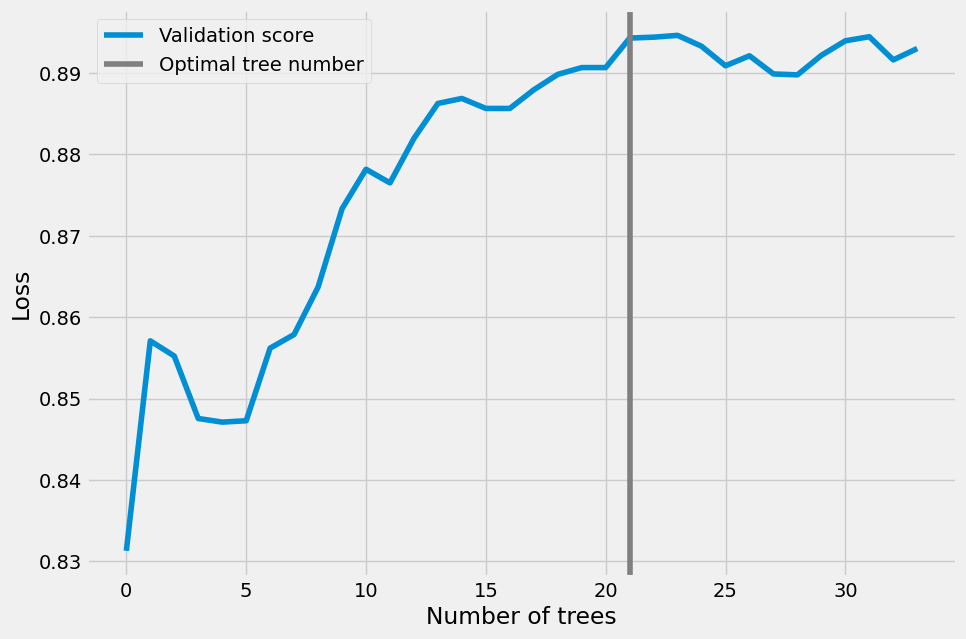

In [18]:
# early stopping
import xgboost as xgb
from matplotlib import pyplot as plt
import joblib

model = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric = 'auc',
    learning_rate = 0.05,
    max_depth=7,
    n_estimators=100,
    subsample=0.6,
    colsample_bytree=0.6,
    early_stopping_rounds=10
    )

model.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=False)

joblib.dump(model, './xgboost_model.pkl')

# print(f'Best parameters: {model.best_params_}')
# print(f'Best score: {model.best_score_ * 100:.2f}%')

results = model.evals_result()

y_pred = model.predict(X_test)
prob = model.predict_proba(X_test)
acc = accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {acc * 100:.2f}%')

print(classification_report(y_pred, y_test))

plt.figure(figsize=(10,7))
plt.plot(results["validation_0"]["auc"], label="Validation score")
plt.axvline(21, color="gray", label="Optimal tree number")
plt.xlabel("Number of trees")
plt.ylabel("Loss")
plt.legend()


In [21]:
# 교차 검증
from sklearn.model_selection import cross_val_score

xgb_scores = cross_val_score(best_model, X, y, cv=5, scoring='roc_auc')
print(f'XGBoost CV AUC: {xgb_scores.mean()}')

XGBoost CV AUC: 0.9161482454186256


In [63]:
xg_result = pd.DataFrame({'y_pred': y_pred, 'y_test': y_test, 'probability': prob[:, 1]})

In [64]:
xg_result

,y_pred,y_test,probability
898,0,0,0.333745
1062,1,1,0.764446
1254,1,1,0.674454
298,0,0,0.309171
237,0,0,0.255413
...,...,...,...
534,0,0,0.257406
542,0,1,0.479977
895,1,0,0.640059
1092,1,1,0.751701


In [65]:
####### 변수 중요도가 높은 순서대로 정렬하고 시각화
val_imp = pd.DataFrame(best_model.feature_importances_, index=X_train.columns, columns=['imp'])
val_imp
val_imp_sorted = val_imp.sort_values(by='imp', ascending=False)
val_imp_sorted

,imp
incident_severity,0.214749
insured_sex_1,0.065518
insured_occupation_2,0.048893
insured_sex_0,0.045512
property_damage_1,0.043822
incident_state_1,0.042069
collision_type_0,0.038819
incident_state_2,0.037953
authorities_contacted_0,0.036912
insured_occupation_1,0.036817


# AdaBoost


In [66]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
# AdaBoost 분류 모델 생성
base_estimator = DecisionTreeClassifier()
model = AdaBoostClassifier(base_estimator=base_estimator, random_state=42)

# 하이퍼파라미터 그리드 설정
param_grid = {
    'learning_rate': [0.01, 0.03, 0.05, 0.07, 0.1],
    'n_estimators': [3, 5, 7, 10, 15, 50, 100,]
}

# GridSearchCV 설정
grid_search = GridSearchCV(estimator=model, param_grid=param_grid)

# 모델 학습
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터 출력
print(f'Best parameters: {grid_search.best_params_}')
print(f'Best score: {grid_search.best_score_ * 100:.2f}%')

# 최적의 모델로 훈련 데이터에 대한 예측
best_model = grid_search.best_estimator_
train_pred = best_model.predict(X_train)

# 테스트 데이터에 대한 예측
y_pred = best_model.predict(X_test)

# 테스트 데이터의 정확도 평가
accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {accuracy * 100:.2f}%')
print(classification_report(y_pred, y_test))

Best parameters: {'learning_rate': 0.01, 'n_estimators': 3}
Best score: 76.22%
Test Accuracy: 77.99%
              precision    recall  f1-score   support

           0       0.77      0.80      0.79       135
           1       0.79      0.76      0.77       133

    accuracy                           0.78       268
   macro avg       0.78      0.78      0.78       268
weighted avg       0.78      0.78      0.78       268



In [67]:
# 교차 검증
ada_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='roc_auc')
print(f'AdaBoost CV AUC: {ada_scores.mean()}')

AdaBoost CV AUC: 0.7619636617749824


In [68]:
ada_result = pd.DataFrame({'y_pred': y_pred, 'y_test': y_test})
ada_result

,y_pred,y_test
898,0,0
1062,1,1
1254,1,1
298,0,0
237,0,0
...,...,...
534,0,0
542,0,1
895,0,0
1092,1,1


In [69]:
####### 변수 중요도가 높은 순서대로 정렬하고 시각화
val_imp = pd.DataFrame(best_model.feature_importances_, index=X_train.columns, columns=['imp'])
val_imp
val_imp_sorted = val_imp.sort_values(by='imp', ascending=False)
val_imp_sorted

,imp
incident_severity,0.317316
vehicle_claim,0.102894
property_claim,0.091659
total_claim_amount,0.065357
insured_occupation_2,0.041680
property_damage_1,0.039201
property_damage_0,0.038122
insured_occupation_1,0.035900
policy_deductable,0.032615
witnesses,0.030572


# Random Forest

In [70]:
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth':  [5, 10, 15, 20],
    'max_features': ['sqrt', 'log2', None],
    'max_leaf_nodes': [1, 2, 4],

}
model = RandomForestClassifier()
grid_search = GridSearchCV(estimator=model, param_grid=param_grid)
grid_search.fit(X_train, y_train)

print(f'Best parameters: {grid_search.best_params_}')
print(f'Best score: {grid_search.best_score_ * 100:.2f}%')

best_model = grid_search.best_estimator_
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {acc * 100:.2f}%')
print(classification_report(y_pred, y_test))

Best parameters: {'max_depth': 15, 'max_features': 'log2', 'max_leaf_nodes': 4, 'n_estimators': 50}
Best score: 79.96%
Test Accuracy: 84.33%
              precision    recall  f1-score   support

           0       0.87      0.84      0.85       146
           1       0.81      0.85      0.83       122

    accuracy                           0.84       268
   macro avg       0.84      0.84      0.84       268
weighted avg       0.84      0.84      0.84       268



In [71]:
# 교차 검증
random_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='roc_auc')
print(f'RandomForest CV AUC: {random_scores.mean()}')

RandomForest CV AUC: 0.8702391767328873


In [72]:
####### 변수 중요도가 높은 순서대로 정렬하고 시각화를 하는 코드를 완성해 보세요.
val_imp = pd.DataFrame(best_model.feature_importances_, index=X_train.columns, columns=['imp'])
val_imp
val_imp_sorted = val_imp.sort_values(by='imp', ascending=False)
val_imp_sorted

,imp
incident_severity,0.243761
property_damage_1,0.130592
incident_state_1,0.121975
insured_sex_0,0.084644
collision_type_0,0.051106
vehicle_claim,0.050957
insured_occupation_2,0.040802
authorities_contacted_2,0.035813
incident_state_2,0.034984
insured_occupation_1,0.033537


# LGBM

In [14]:
import lightgbm as lgb

model = lgb.LGBMClassifier()

param_lgb = {
    "learning_rate" : [0.01,0.1,0.2,0.3,0.4,0.5],
    "max_depth" : [25, 50, 75],
    "num_leaves" : [100,300,500,900,1200],
    "n_estimators" : [100, 200, 300,500,800,1000],
    "learning_rate" : [0.01,0.1,0.2,0.3,0.4,0.5],
}
grid_search = GridSearchCV(estimator=model, param_grid = param_lgb, verbose=True)

grid_search.fit(X_train, y_train, eval_set=[(X_test, y_test)])

best_model = grid_search.best_estimator_

print(f'Best parameters: {grid_search.best_params_}')
print(f'Best score: {grid_search.best_score_ * 100:.2f}%')

y_pred = best_model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {acc * 100:.2f}%')

print(classification_report(y_pred, y_test))

# 실행 결과/ 데이터 수가 적어 overfitting 됩니다!

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

In [17]:
# 교차 검증
lgbm_scores = cross_val_score(best_model, X, y, cv=5, scoring='roc_auc')
print(f'LGBM CV AUC: {lgbm_scores.mean()}')

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

# Catboost

In [22]:
!pip install catboost
import catboost as cat

model = cat.CatBoostClassifier()

param_cat = {
    "depth" : [6],
    "iterations" : [96],
    "learning_rate" : [0.1],
    "l2_leaf_reg" : [5],
    "border_count" : [254]
}
grid_search = GridSearchCV(estimator=model, param_grid = param_cat)

grid_search.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=False)

best_model = grid_search.best_estimator_


print(f'Best parameters: {grid_search.best_params_}')
print(f'Best score: {grid_search.best_score_ * 100:.2f}%')


y_pred = best_model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {acc * 100:.2f}%')

print(classification_report(y_pred, y_test))


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 9.7 MB/s eta 0:00:00
Best parameters: {'border_count': 254, 'depth': 6, 'iterations': 96, 'l2_leaf_reg': 5, 'learning_rate': 0.1}
Best score: 84.74%
Test Accuracy: 82.46%
              precision    recall  f1-score   support

           0       0.82      0.84      0.83       137
           1       0.83      0.81      0.82       131

    accuracy                           0.82       268
   macro avg       0.82      0.82      0.82       268
weighted avg       0.82      0.82      0.82       268



In [23]:
# 교차 검증
catboost_scores = cross_val_score(best_model, X, y, cv=5, scoring='roc_auc')
print(f'CatBoost CV AUC: {catboost_scores.mean()}')

0:	learn: 0.6389713	total: 5.1ms	remaining: 485ms
1:	learn: 0.5968788	total: 11.7ms	remaining: 552ms
2:	learn: 0.5675324	total: 18.8ms	remaining: 581ms
3:	learn: 0.5280212	total: 22.4ms	remaining: 516ms
4:	learn: 0.4833189	total: 28.9ms	remaining: 525ms
5:	learn: 0.4650388	total: 34.4ms	remaining: 516ms
6:	learn: 0.4425421	total: 60.9ms	remaining: 774ms
7:	learn: 0.4232729	total: 63.8ms	remaining: 701ms
8:	learn: 0.3996774	total: 66.1ms	remaining: 639ms
9:	learn: 0.3854263	total: 68.2ms	remaining: 587ms
10:	learn: 0.3730943	total: 73.3ms	remaining: 567ms
11:	learn: 0.3607075	total: 76.5ms	remaining: 535ms
12:	learn: 0.3476801	total: 81.9ms	remaining: 523ms
13:	learn: 0.3383004	total: 84.3ms	remaining: 494ms
14:	learn: 0.3309244	total: 88.3ms	remaining: 477ms
15:	learn: 0.3230036	total: 90.4ms	remaining: 452ms
16:	learn: 0.3115380	total: 92.3ms	remaining: 429ms
17:	learn: 0.3048833	total: 94.4ms	remaining: 409ms
18:	learn: 0.2972008	total: 97.7ms	remaining: 396ms
19:	learn: 0.2881386	to

In [24]:
####### 변수 중요도가 높은 순서대로 정렬하고 시각화를 하는 코드를 완성해 보세요.
val_imp = pd.DataFrame(best_model.feature_importances_, index=X_train.columns, columns=['imp'])
val_imp
val_imp_sorted = val_imp.sort_values(by='imp', ascending=False)
val_imp_sorted

,imp
incident_severity,24.294202
collision_type_0,6.545054
policy_deductable,6.165240
collision_type_2,5.848676
witnesses,5.287058
property_claim,4.971483
incident_state_1,4.574888
incident_state_2,4.550580
insured_sex_0,4.436538
vehicle_claim,4.206590
